# Logistic regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Create a dataset

#### Gaussian Multivariate

In [ ]:
def makeMultivariate(u1, cov1, u2, cov2, cnt):
  cnt1 = cnt // 2
  cnt2 = cnt - cnt1
  X = np.concatenate((np.random.multivariate_normal(u1, cov1, cnt1), np.random.multivariate_normal(u2, cov2, cnt2) ))
  y = np.concatenate((np.zeros(cnt1), np.ones(cnt2))).astype('int')
  return (X, y)

# a
# X, y = makeMultivariate([3, 2], [[25, 0],[0, 9]], [10, 5], [[25, 0],[0, 9]], 100)
# testX, testY = makeMultivariate([3, 2], [[25, 0],[0, 9]], [10, 5], [[10, 5],[5, 10]], 10000)

# b
X, y = makeMultivariate([3, 2], [[25, 0],[0, 9]], [10, 5], [[25, 0],[0, 9]], 10000)
testX, testy = makeMultivariate([3, 2], [[25, 0],[0, 9]], [10, 5], [[25, 0],[0, 9]], 10000)
numOfClasses = 2

print(X)
print(y)

[[11.66900759  3.97722915]
 [-3.91648566  0.02862152]
 [ 1.54667588  0.46584142]
 ...
 [11.16105985  6.56189847]
 [13.34060505  1.84222445]
 [12.12060558  5.43927405]]
[0 0 0 ... 1 1 1]


#### Iris

In [ ]:
import requests

iristext = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data").text.strip()
classes = {}
def getNum(a):
  if a not in classes:
      classes[a] = len(classes)
  return classes[a]

X = []
y = []
for row in iristext.splitlines():
    row = row.split(',')
    X.append(list(map(float, row[:4])))
    y.append(getNum(row[4]))

m = len(X) * 9 // 10
X, testX = np.split(np.array(X), [m])
y, testy = np.split(np.array(y), [m])
numOfClasses = len(classes)

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Text(0, 0.5, '$X_2$')

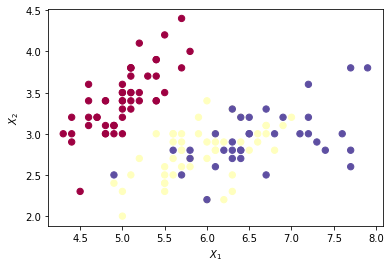

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# blue dots = 1, red dots = 0

## Prepare dataset

In [ ]:
def makeY(y):
    id = np.identity(numOfClasses)
    return id[y]

def add_intercept(X):
    intercept = np.ones( (X.shape[0], 1)  )
    return np.concatenate((intercept, X), axis=1)

XX = add_intercept(X)
testXX = add_intercept(testX)
yy = makeY(y)

## Gradient descent

In [ ]:
import random

num_iter = 100000
cost_list = []
m = yy.size
alpha = 0.01
numOfFeatures = XX.shape[1]
theta = np.zeros((numOfFeatures, numOfClasses))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.matmul(X, theta)
    h = sigmoid(z)
    return h


for i in range(num_iter):
    Xsgd = XX
    ysgd = yy

    # sgd = random.randint(0, m - 1)
    # Xsgd = XX[sgd:sgd+1]
    # ysgd = yy[sgd:sgd+1]

    h = calc_h(Xsgd, theta)
    gradient = np.dot(Xsgd.T, (h - ysgd)) / m
    theta -= alpha * gradient


print('theta: {}'.format(theta))

theta: [[ 0.10425857 -0.02904128 -0.15227293]
 [ 0.14923216 -0.11080295 -0.36464877]
 [ 0.56048036 -0.35709178 -0.45843362]
 [-0.91900017  0.30077376  0.58799261]
 [-0.40524916  0.07912432  0.33649489]]


## Making predictions

In [ ]:
preds = np.argmax(calc_h(XX, theta), 1)
print('Training Accuracy: {}'.format((preds == y).mean()))

preds_testing = np.argmax(calc_h(testXX, theta), 1)
print('Testing Accuracy: {}'.format((preds_testing == testy).mean()))

Training Accuracy: 0.9037037037037037
Testing Accuracy: 0.4666666666666667
